# Exercise 18 - SIB - Portfolio of Machine Learning Algorithms

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [63]:
img = mpimg.imread('data/home.png')
data = img.reshape(1,img.shape[0], img.shape[1], img.shape[2])


print(type(img))
print("Image dimension ",img.shape)
print("Input data dimension ", data.shape)

<class 'numpy.ndarray'>
Image dimension  (252, 362, 3)
Input data dimension  (1, 252, 362, 3)


(-0.5, 361.5, 251.5, -0.5)

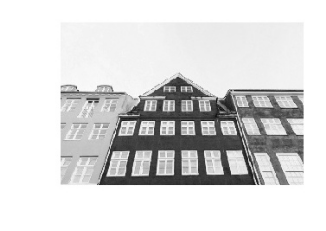

In [64]:
plt.imshow(data[0,:,:,:])
plt.grid(False)
plt.axis("off")

## *Exercise 18.1:*

### Paddding

Define method named pad_with_zeros that performs specified number of zero padding on the input data.
- parameters:
    - data: input data
    - pad: number of zero padding
- returns:
    - data_padded: the nd-array after padding  

In [65]:
def pad_with_zeros(data: np.ndarray, pad: int) -> np.ndarray:
    """
    Pad image with zeros. The padding is applied to the height and width of an image,
    
    Parameters
    ----------
    data: numpy array
        input data
    pad: int
        number of zero padding

    Returns
    -------
    data_padded: numpy array
        the nd-array after padding
    """
    data_padded = np.pad(data, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode='constant', constant_values=0)
    return data_padded

Apply the zero_pad method to data:
- expected output of "pad_with_zeros(data, 10)[0,8:12,8:12,1]":

[[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 1. 1.]
[0. 0. 1. 1.]]
 

dimension before padding:  (1, 252, 362, 3)
dimension after padding:  (1, 272, 382, 3)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


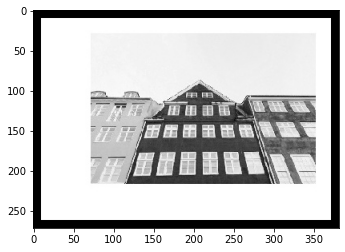

In [66]:
print("dimension before padding: ", data.shape)
img_pad = pad_with_zeros(data, 10)
print("dimension after padding: ", img_pad.shape)
print(img_pad[0,8:12,8:12,1]) # output should be the one above
plt.imshow(img_pad[0,:,:,:], cmap = "gray")
plt.grid(False)

## *Exercise 18.2:*

### Convolution

#### Single step convolution

Define the function named single_step_convolution() to convolve a slice of input data using the specified filter.

- parameters:

   - data_slice: the slice of input data
   - W: the filter used for convolution  
   - b: the bias term
     
- returns:

   - Z: the output of the convolution operation

In [67]:
def single_step_convolution(data_slice: np.ndarray, W: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
    Convolve a slice of input data using the specified filter and bias.
    
    Parameters
    ----------
    data_slice: numpy array
        the slice of input data
    W: numpy array
        the filter used for convolution
    b: numpy array
        the bias term
        
    Returns
    -------
    Z: numpy array
        the output of the convolution operation
    """
    
    convolution_res = np.sum(data_slice * W)
    Z = convolution_res + b

    return Z

#### Strided convolution

Strided convolution is a variation of the convolution operation in CNNs where the filter does not move one pixel at a time but skips a certain number of pixels, known as the stride, during each step of the convolution.

Define method convolution_forward to perform strided convolution on the input data. Use single_step_convolution() to perform the convolution at each stride.

- parameters:

   - data: the input data
   - W: the filter used for convolution
   - b: the bias term
   - stride: the stride used for convolution
   - pad: the number of zero padding used for convolution
  
- returns:
    - Z: the output of the convolution operation

In [68]:
# show convolution gif
from IPython.display import Image
Image(url='data/convolution.gif')

In [69]:
# show stride gif
Image(url='data/stride.gif')

In [70]:
def convolution_forward(data: np.ndarray, W: np.ndarray, b: np.ndarray, stride: int, pad: int) -> np.ndarray:
    """
    Perform strided convolution on the input data.
    
    Parameters
    ----------
    data: numpy array
        the input data
    W: numpy array
        the filter used for convolution
    b: numpy array
        the bias term
    stride: int
        the stride used for convolution
    pad: int
        the number of zero padding used for convolution

    Returns
    -------
    Z: numpy array
        the output of the convolution operation
    """
    # dimensions are m (number of examples), h_prev (height), w_prev (width), c_prev (number of channels)
    m, h_prev, w_prev, c_prev = data.shape
    # dimensions are f1 (height of the filter), f2 (width of the filter), c_prev (number of channels), n_c (number of filters)
    f1, f2, c_prev, n_c = W.shape
      
    # calculate the dimension of the output (n_h is the height of the output, n_w is the width of the output)
    n_h = int((h_prev - f1 + 2 * pad) / stride) + 1
    n_w = int((w_prev - f2 + 2 * pad) / stride) + 1
      
    # initialize the output Z with zeros (4 dimensions -> batch size, height, width, number of filters)
    Z = np.zeros((m, n_h, n_w, n_c))
    # pad the input data
    A_prev_pad = pad_with_zeros(data, pad)
    for i in range(m):
        for h in range(n_h):
            for w in range(n_w):
                for c in range(n_c):
                    # find the slice of the input data to be convolved (take into account the stride and filter size (W))
                    w_start = w * stride
                    w_end = w_start + f2
                    h_start = h * stride
                    h_end = h_start + f1 
            
                    Z[i,h,w,c] = single_step_convolution(A_prev_pad[i, h_start:h_end, w_start:w_end, :], W[:,:,:,c], b[:,:,:,c])
    return Z

In [71]:
np.random.seed(1)
# dimensions are 10 batch size, 4 height, 4 width, 3 channels
input_ = np.random.randn(10, 4, 4, 3)
# dimensions are 2 height, 2 width, 3 channels, 8 filters
W = np.random.randn(2, 2, 3, 8)
# dimensions are 1, 1, 1, 8, i.e. one bias per filter
b = np.random.randn(1, 1, 1, 8)
pad = 1
stride = 1

output_ = convolution_forward(input_, W, b, stride, pad)
print(np.mean(output_))

-0.007843400138348266


In [72]:
# edge detection filter
edge_detect = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).reshape((3,3,1,1))

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


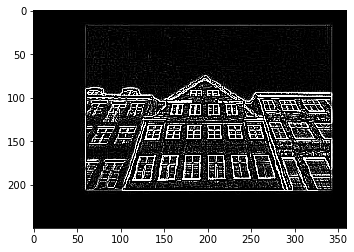

In [73]:
pad = 0
stride = 1
b = np.zeros((1, 1, 1, 1))
Z = convolution_forward(data, edge_detect, b, stride, pad)


plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

output2 = np.mean(Z[0,100:200,200:300,0])

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


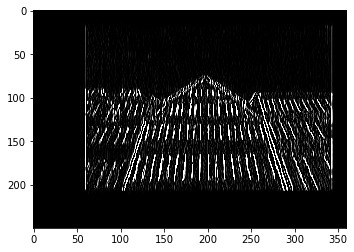

In [74]:
# vetical filter for edge detection
vertical_filter = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]]).reshape(3,3,1,1)

Z = convolution_forward(data, vertical_filter, b, stride, pad)
plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

dimension of image before convolution:  (1, 252, 362, 3)
dimension of image after convolution:  (1, 250, 360, 1)


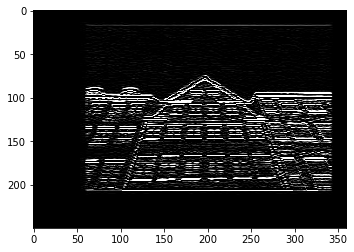

In [75]:
# horizontal filter for edge detection
horizontal_filter = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]]).reshape((3,3,1,1))
Z = convolution_forward(data, horizontal_filter, b, stride, pad)
plt.clf()
plt.imshow(Z[0,:,:,0], cmap='gray',vmin=0, vmax=1)
plt.grid(False)
print("dimension of image before convolution: ", data.shape)
print("dimension of image after convolution: ", Z.shape)

## *Exercise 18.3:*

### Pooling

#### Max pooling

Define method max_pooling to perform max pooling on the input data.

- parameters:

    - data: input data on which convolution is performed  
    - f: filter size 
    - stride: the number of strides
    
- returns:
    - Z: the output of the max pooling operation

In [76]:
Image(url='data/maxpool.gif')

In [77]:
def max_pooling(input: np.ndarray, f: int, stride: int) -> np.ndarray:
    """
    Perform max pooling on the input data.
    
    Parameters
    ----------
    input: numpy array
        input data on which convolution is performed
    f: int
        filter size
    stride: int
        the number of strides

    Returns
    -------
    output: numpy array
        the output of the max pooling operation
    """
    m, h_prev, w_prev, c_prev = input.shape
    # calculate the dimension of the output (h_out is the height of the output, w_out is the width of the output)
    h_out = int(1 + (h_prev - f) / stride)
    w_out = int(1 + (w_prev - f) / stride)
    # initialize the output Z with zeros (4 dimensions -> batch size, height, width, number of channels)
    output = np.zeros((m, h_out, w_out, c_prev))
    for i in range(m):
        for c in range(c_prev):
            for h in range(h_out):
                for w in range(w_out):
                    # find the slice of the input data to be pooled (take into account the stride and filter size (f))
                    w_start = w * stride
                    w_end = w_start + f
                    h_start = h * stride
                    h_end = h_start + f
                    output[i, h, w, c] = np.max(input[i,h_start:h_end, w_start:w_end, c])
    assert output.shape == (m, h_out, w_out, c_prev)
    return output

In [78]:
f = 2
stride = 2
output_ = max_pooling(input_, f, stride)
print(np.mean(output_))

1.0753012177728354


dimension before pooling : (1, 250, 360, 1)
dimension after pooling : (10, 3, 3, 3)


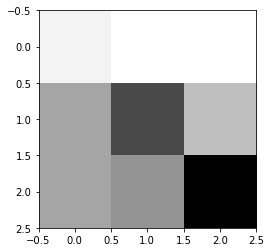

In [79]:
stride = 1 
f = 2
Z_pool =  max_pooling(input_, f, stride)
###End code

print("dimension before pooling :", Z.shape)
print("dimension after pooling :", Z_pool.shape)

plt.imshow(Z_pool[0,:,:,0], cmap = "gray")